<a href="https://colab.research.google.com/github/haduycattuong/DataMining-LayoffsDataset/blob/main/Layoffs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs Dataset 2023/layoffs_data.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2738 non-null   object 
 1   Location_HQ                 2738 non-null   object 
 2   Industry                    2738 non-null   object 
 3   Percentage                  1819 non-null   float64
 4   Date                        2738 non-null   object 
 5   Source                      2738 non-null   object 
 6   Funds_Raised                2466 non-null   float64
 7   Stage                       2738 non-null   object 
 8   Date_Added                  2738 non-null   object 
 9   Country                     2738 non-null   object 
 10  Laid_Off_Count              1871 non-null   float64
 11  List_of_Employees_Laid_Off  2737 non-null   object 
dtypes: float64(3), object(9)
memory usage: 256.8+ KB


In [ ]:
def get_date():
    year_list = []

    col = df['Date_Added']
    for i in range(len(col)):
        date = col[i]
        year = col[i].split("-", 1)[0]
        year_list.append(year)
        # break
    return year_list

layoff_year_list = get_date()

In [193]:
df['Year'] = layoff_year_list

In [194]:
df.drop(['Source', 'Date_Added', 'List_of_Employees_Laid_Off', 'Location_HQ', 'Date'], axis = 1, inplace = True)

In [220]:
df1 = df[(df['Laid_Off_Count'].notna()) & (df['Percentage'].notna())].dropna().reset_index().drop('index', axis = 1)
df1

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
0,Ritual,Food,0.40,134.0,Series C,Canada,38.0,2023
1,Grab,Transportation,0.11,16500.0,Post-IPO,Singapore,1000.0,2023
2,Chigari,Media,0.20,88.0,Unknown,India,48.0,2023
3,Mojocare,Healthcare,0.80,24.0,Series A,India,170.0,2023
4,CareRev,Healthcare,0.33,51.0,Series A,United States,100.0,2023
...,...,...,...,...,...,...,...,...
1238,Inspirato,Travel,0.22,79.0,Series C,United States,130.0,2020
1239,Help.com,Support,1.00,6.0,Seed,United States,16.0,2020
1240,HopSkipDrive,Transportation,0.10,45.0,Unknown,United States,8.0,2020
1241,Panda Squad,Consumer,0.75,1.0,Seed,United States,6.0,2020


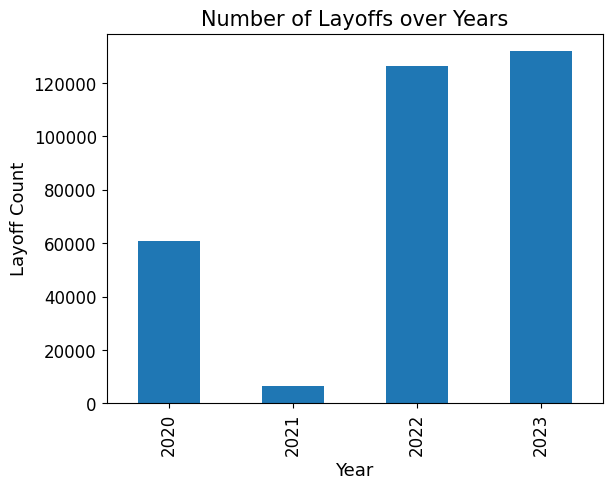

In [197]:
df1.groupby('Year')['Laid_Off_Count'].sum().plot(kind='bar',fontsize=12)
plt.title('Number of Layoffs over Years',size=15)
plt.xlabel('Year',size=13)
plt.ylabel('Layoff Count',size=13);

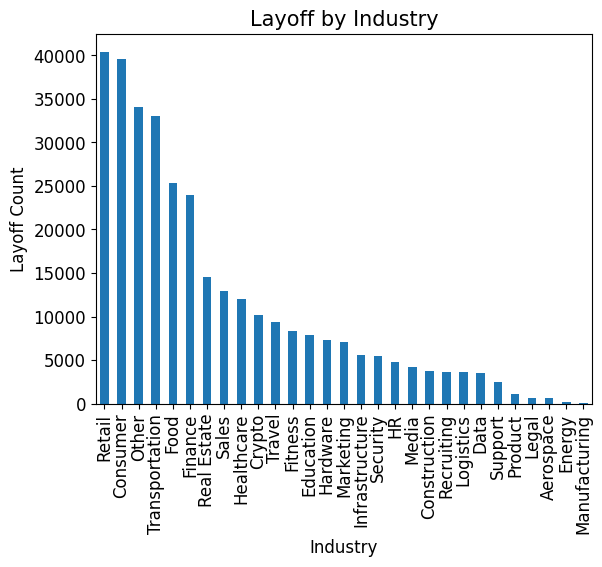

In [198]:
df1.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).plot(kind='bar',fontsize=12)
plt.title('Layoff by Industry',size=15)
plt.xlabel('Industry',size=12)
plt.ylabel('Layoff Count',size=12);

In [199]:
df2 = df1.copy()
df2

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
0,Ritual,Food,0.40,134.0,Series C,Canada,38.0,2023
1,Grab,Transportation,0.11,16500.0,Post-IPO,Singapore,1000.0,2023
2,Chigari,Media,0.20,88.0,Unknown,India,48.0,2023
3,Mojocare,Healthcare,0.80,24.0,Series A,India,170.0,2023
4,CareRev,Healthcare,0.33,51.0,Series A,United States,100.0,2023
...,...,...,...,...,...,...,...,...
1238,Inspirato,Travel,0.22,79.0,Series C,United States,130.0,2020
1239,Help.com,Support,1.00,6.0,Seed,United States,16.0,2020
1240,HopSkipDrive,Transportation,0.10,45.0,Unknown,United States,8.0,2020
1241,Panda Squad,Consumer,0.75,1.0,Seed,United States,6.0,2020


In [200]:
df1['Stage_New'] = ""
df1.loc[df1['Stage'].str.contains("Post-IPO"), 'Stage_New'] = "0"
df1.loc[df1['Stage_New'] == "", 'Stage_New'] = "1"

df2['Stage'] = df1['Stage_New']
df2.head()

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
0,Ritual,Food,0.40,134.0,1,Canada,38.0,2023
1,Grab,Transportation,0.11,16500.0,0,Singapore,1000.0,2023
2,Chigari,Media,0.20,88.0,1,India,48.0,2023
3,Mojocare,Healthcare,0.80,24.0,1,India,170.0,2023
4,CareRev,Healthcare,0.33,51.0,1,United States,100.0,2023


In [201]:
df1['Country_New'] = ""
df1.loc[df1['Country'].str.contains("United States"), 'Country_New'] = "0"
df1.loc[df1['Country_New'] == "", 'Country_New'] = "1"

df2['Country'] = df1['Country_New']
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Cleaned.csv',index = False)
df2.head()

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
0,Ritual,Food,0.40,134.0,1,1,38.0,2023
1,Grab,Transportation,0.11,16500.0,0,1,1000.0,2023
2,Chigari,Media,0.20,88.0,1,1,48.0,2023
3,Mojocare,Healthcare,0.80,24.0,1,1,170.0,2023
4,CareRev,Healthcare,0.33,51.0,1,0,100.0,2023


#1/KNN Classification Report, Naive Bayes


In [202]:
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Cleaned.csv')
df4

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
0,Ritual,Food,0.40,134.0,1,1,38.0,2023
1,Grab,Transportation,0.11,16500.0,0,1,1000.0,2023
2,Chigari,Media,0.20,88.0,1,1,48.0,2023
3,Mojocare,Healthcare,0.80,24.0,1,1,170.0,2023
4,CareRev,Healthcare,0.33,51.0,1,0,100.0,2023
...,...,...,...,...,...,...,...,...
1238,Inspirato,Travel,0.22,79.0,1,0,130.0,2020
1239,Help.com,Support,1.00,6.0,1,0,16.0,2020
1240,HopSkipDrive,Transportation,0.10,45.0,1,0,8.0,2020
1241,Panda Squad,Consumer,0.75,1.0,1,0,6.0,2020


In [203]:
data = df4.dropna()
data = data.reset_index().drop('index', axis = 1)
data

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
0,Ritual,Food,0.40,134.0,1,1,38.0,2023
1,Grab,Transportation,0.11,16500.0,0,1,1000.0,2023
2,Chigari,Media,0.20,88.0,1,1,48.0,2023
3,Mojocare,Healthcare,0.80,24.0,1,1,170.0,2023
4,CareRev,Healthcare,0.33,51.0,1,0,100.0,2023
...,...,...,...,...,...,...,...,...
1238,Inspirato,Travel,0.22,79.0,1,0,130.0,2020
1239,Help.com,Support,1.00,6.0,1,0,16.0,2020
1240,HopSkipDrive,Transportation,0.10,45.0,1,0,8.0,2020
1241,Panda Squad,Consumer,0.75,1.0,1,0,6.0,2020


In [218]:
data.describe()

,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000
mean,0.220730,797.220479,0.790829,0.348351,261.954143,2021.728882
std,0.204786,5254.424013,0.406881,0.476640,852.480570,1.129189
min,0.000000,0.000000,0.000000,0.000000,3.000000,2020.000000
25%,0.100000,62.000000,1.000000,0.000000,40.000000,2020.000000
50%,0.150000,178.000000,1.000000,0.000000,81.000000,2022.000000
75%,0.280000,480.500000,1.000000,1.000000,190.500000,2023.000000
max,1.000000,121900.000000,1.000000,1.000000,12000.000000,2023.000000


In [204]:
data['Laid_Off_Rank'] = ""
data.loc[(data['Laid_Off_Count'] >= 250) & (data['Laid_Off_Count'] < 400), 'Laid_Off_Rank'] = "Medium"
data.loc[(data['Laid_Off_Count'] >= 400), 'Laid_Off_Rank'] = "High"
data.loc[(data['Laid_Off_Count'] < 250) , 'Laid_Off_Rank'] = "Low"
data

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Laid_Off_Rank
0,Ritual,Food,0.40,134.0,1,1,38.0,2023,Low
1,Grab,Transportation,0.11,16500.0,0,1,1000.0,2023,High
2,Chigari,Media,0.20,88.0,1,1,48.0,2023,Low
3,Mojocare,Healthcare,0.80,24.0,1,1,170.0,2023,Low
4,CareRev,Healthcare,0.33,51.0,1,0,100.0,2023,Low
...,...,...,...,...,...,...,...,...,...
1238,Inspirato,Travel,0.22,79.0,1,0,130.0,2020,Low
1239,Help.com,Support,1.00,6.0,1,0,16.0,2020,Low
1240,HopSkipDrive,Transportation,0.10,45.0,1,0,8.0,2020,Low
1241,Panda Squad,Consumer,0.75,1.0,1,0,6.0,2020,Low


In [205]:
train_df, test_df = train_test_split(data, test_size = 0.1, random_state = 42)

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(train_df[['Percentage', 'Funds_Raised', 'Stage', 'Country', 'Laid_Off_Count', 'Year']], train_df['Laid_Off_Rank'])

knn_predictions = knn_model.predict(test_df[['Percentage', 'Funds_Raised', 'Stage', 'Country', 'Laid_Off_Count', 'Year']])

print("KNN Classification Report: ")
print(classification_report(test_df['Laid_Off_Rank'], knn_predictions))

KNN Classification Report: 
              precision    recall  f1-score   support

        High       0.92      0.86      0.89        14
         Low       0.98      1.00      0.99        99
      Medium       0.82      0.75      0.78        12

    accuracy                           0.96       125
   macro avg       0.91      0.87      0.89       125
weighted avg       0.96      0.96      0.96       125



In [206]:
nb_model = GaussianNB()
nb_model.fit(train_df[['Percentage', 'Funds_Raised', 'Stage', 'Country', 'Laid_Off_Count', 'Year']], train_df['Laid_Off_Rank'])

nb_predictions = nb_model.predict(test_df[['Percentage', 'Funds_Raised', 'Stage', 'Country', 'Laid_Off_Count', 'Year']])
print("Naive_Bayes Classification Report: ")
print(classification_report(test_df['Laid_Off_Rank'], nb_predictions))

Naive_Bayes Classification Report: 
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        14
         Low       1.00      1.00      1.00        99
      Medium       1.00      1.00      1.00        12

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



In [207]:
#Xuất ra file Layoffs_Final_Rank để làm KMeans
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Final_Rank.csv')
data

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Laid_Off_Rank
0,Ritual,Food,0.40,134.0,1,1,38.0,2023,Low
1,Grab,Transportation,0.11,16500.0,0,1,1000.0,2023,High
2,Chigari,Media,0.20,88.0,1,1,48.0,2023,Low
3,Mojocare,Healthcare,0.80,24.0,1,1,170.0,2023,Low
4,CareRev,Healthcare,0.33,51.0,1,0,100.0,2023,Low
...,...,...,...,...,...,...,...,...,...
1238,Inspirato,Travel,0.22,79.0,1,0,130.0,2020,Low
1239,Help.com,Support,1.00,6.0,1,0,16.0,2020,Low
1240,HopSkipDrive,Transportation,0.10,45.0,1,0,8.0,2020,Low
1241,Panda Squad,Consumer,0.75,1.0,1,0,6.0,2020,Low


#2/KMeans


In [208]:
data_kmeans = data.dropna()
data_kmeans

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Laid_Off_Rank
0,Ritual,Food,0.40,134.0,1,1,38.0,2023,Low
1,Grab,Transportation,0.11,16500.0,0,1,1000.0,2023,High
2,Chigari,Media,0.20,88.0,1,1,48.0,2023,Low
3,Mojocare,Healthcare,0.80,24.0,1,1,170.0,2023,Low
4,CareRev,Healthcare,0.33,51.0,1,0,100.0,2023,Low
...,...,...,...,...,...,...,...,...,...
1238,Inspirato,Travel,0.22,79.0,1,0,130.0,2020,Low
1239,Help.com,Support,1.00,6.0,1,0,16.0,2020,Low
1240,HopSkipDrive,Transportation,0.10,45.0,1,0,8.0,2020,Low
1241,Panda Squad,Consumer,0.75,1.0,1,0,6.0,2020,Low


In [209]:
data['Rank_New'] = ""
data.loc[data['Laid_Off_Rank'].str.contains("Low"), 'Rank_New'] = "0"
data.loc[data['Laid_Off_Rank'].str.contains("Medium"), 'Rank_New'] = "0.5"
data.loc[data['Laid_Off_Rank'].str.contains("High"), 'Rank_New'] = "1"
data_kmeans['Laid_Off_Rank'] = data['Rank_New']
data_kmeans.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Final_Kmeans.csv')
data_kmeans.head()

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Laid_Off_Rank
0,Ritual,Food,0.40,134.0,1,1,38.0,2023,0
1,Grab,Transportation,0.11,16500.0,0,1,1000.0,2023,1
2,Chigari,Media,0.20,88.0,1,1,48.0,2023,0
3,Mojocare,Healthcare,0.80,24.0,1,1,170.0,2023,0
4,CareRev,Healthcare,0.33,51.0,1,0,100.0,2023,0


In [210]:
#tach thanh 2 tap tin train va test
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data_kmeans, test_size = 0.1, random_state = 42)
data_train.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Kmeans_Train.csv',index=False)
data_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Kmeans_Test.csv',index=False)


In [211]:
from sklearn.cluster import KMeans
#loai bo company va industry
X_train = data_train.drop(labels = ['Company', 'Industry'], axis = 1)
#thuc hien gom cum Kmean cho tap train voi k=2 k=3 k=4, k=5, k=6
kmeans3 = KMeans(n_clusters=3,random_state=0).fit(X_train)
kmeans5 = KMeans(n_clusters=5,random_state=0).fit(X_train)
kmeans6 = KMeans(n_clusters=6,random_state=0).fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

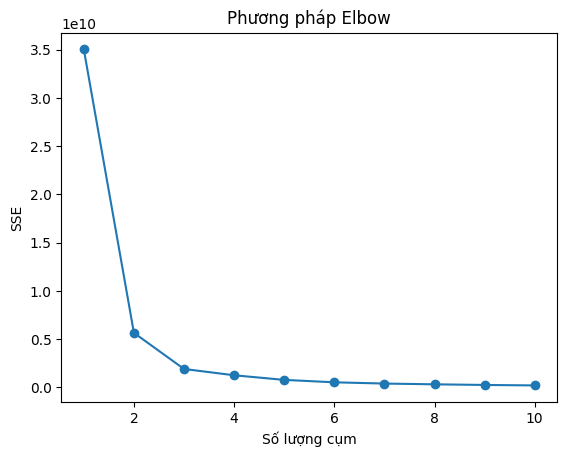

In [212]:
data_train = data_train.drop(labels = ['Company', 'Industry'], axis = 1)
max_clusters = 10
sse = []
for k in range(1, max_clusters + 1):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data_train)
  sse.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), sse, marker = 'o')
plt.xlabel('Số lượng cụm')
plt.ylabel('SSE')
plt.title('Phương pháp Elbow')
plt.show()

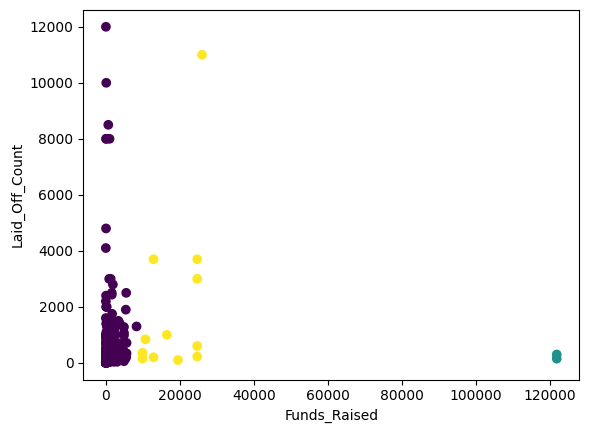

In [213]:
#fit model Kmeans voi du lieu da duoc chuan hoa:
X_train = data_train
y_pred_3 = kmeans3.predict(X_train)

import matplotlib.pyplot as plt
plt.xlabel('Funds_Raised')
plt.ylabel('Laid_Off_Count')
plt.scatter(X_train['Funds_Raised'],X_train['Laid_Off_Count'],c=y_pred_3)
plt.show()


In [214]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train['Laid_Off_Rank'] = le.fit_transform(data_train['Laid_Off_Rank'])
y_true = data_train['Laid_Off_Rank']
#0: Low, 1: Medium, 2: High
print(confusion_matrix(y_true, y_pred_3))
print(classification_report(y_true, y_pred_3))

[[891   1   4]
 [ 83   1   1]
 [130   0   7]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       896
           1       0.50      0.01      0.02        85
           2       0.58      0.05      0.09       137

    accuracy                           0.80      1118
   macro avg       0.63      0.35      0.34      1118
weighted avg       0.76      0.80      0.73      1118



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

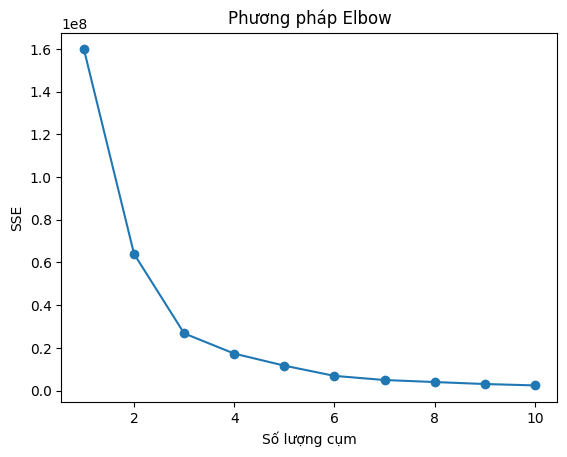

In [215]:
data_test = data_test.drop(labels = ['Company', 'Industry'], axis = 1)
max_clusters = 10
sse = []
for k in range(1, max_clusters + 1):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data_test)
  sse.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), sse, marker = 'o')
plt.xlabel('Số lượng cụm')
plt.ylabel('SSE')
plt.title('Phương pháp Elbow')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


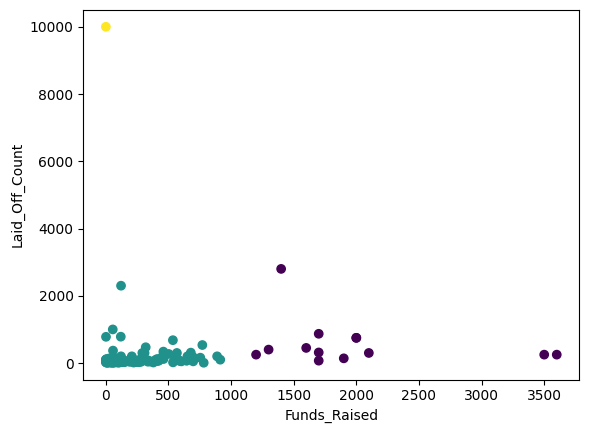

In [216]:
X_test = data_test
kmeans3 = KMeans(n_clusters=3,random_state=0).fit(X_test)
kmeans5 = KMeans(n_clusters=5,random_state=0).fit(X_test)

y_pred_5 = kmeans5.predict(X_test)
y_pred_3 = kmeans3.predict(X_test)
import matplotlib.pyplot as plt
plt.xlabel('Funds_Raised')
plt.ylabel('Laid_Off_Count')

plt.scatter(X_test['Funds_Raised'],X_test['Laid_Off_Count'],c=y_pred_3)
plt.show()

In [217]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_test['Laid_Off_Rank'] = le.fit_transform(data_test['Laid_Off_Rank'])
y_true = data_test['Laid_Off_Rank']
#0: Low, 1: Medium, 2: High
print(confusion_matrix(y_true, y_pred_3))
print(classification_report(y_true, y_pred_3))

[[ 2 97  0]
 [ 5  7  0]
 [ 6  7  1]]
              precision    recall  f1-score   support

           0       0.15      0.02      0.04        99
           1       0.06      0.58      0.11        12
           2       1.00      0.07      0.13        14

    accuracy                           0.08       125
   macro avg       0.41      0.22      0.09       125
weighted avg       0.24      0.08      0.05       125

